# Cars-Purchase decision Dataset
We will look into the dataset and based on different parameters will predict if the loan will be approved or not.


In [1]:
# Import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

#Import Kaggle  to access the data
import kagglehub

#downloand the data
path = kagglehub.dataset_download("gabrielsantello/cars-purchase-decision-dataset")

# Find the CSV file within the downloaded directory
for filename in os.listdir(path):
    if filename.endswith(".csv"):
        filepath = os.path.join(path, filename)
        break  # Stop searching once the CSV is found

car_data = pd.read_csv(filepath)

#display the data
car_data.head()

100%|██████████| 6.13k/6.13k [00:00<00:00, 2.78MB/s]

Extracting files...


,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [2]:
car_data = car_data.drop(['User ID'],axis=1)

#exploring the data in detail
car_data.info()
car_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Gender        1000 non-null   object
 1   Age           1000 non-null   int64 
 2   AnnualSalary  1000 non-null   int64 
 3   Purchased     1000 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 31.4+ KB


,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000
mean,40.106000,72689.000000,0.402000
std,10.707073,34488.341867,0.490547
min,18.000000,15000.000000,0.000000
25%,32.000000,46375.000000,0.000000
50%,40.000000,72000.000000,0.000000
75%,48.000000,90000.000000,1.000000
max,63.000000,152500.000000,1.000000


In [3]:
#Checking for missing values
car_data.isnull().sum()

,0
Gender,0
Age,0
AnnualSalary,0
Purchased,0


No null values

In [ ]:
#checking for duplicates
car_data.duplicated().sum()

0

No Duplicate values either

Doing BAsic EDA to know the relationship between the parameters

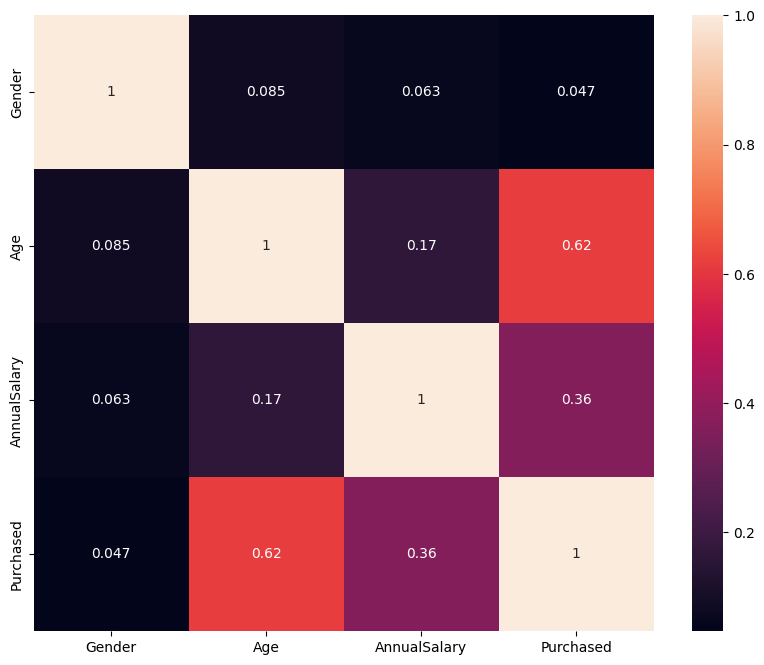

In [5]:
car_data['Gender'] = car_data['Gender'].map({'Male': 0, 'Female': 1})

#doing the heat map
plt.figure(figsize=(10,8))
sns.heatmap(car_data.corr(numeric_only=True),annot=True)
plt.show()

The heatmap shows that the purchse decision has a strong positive relation to Annual Salary

<Axes: xlabel='AnnualSalary', ylabel='Count'>

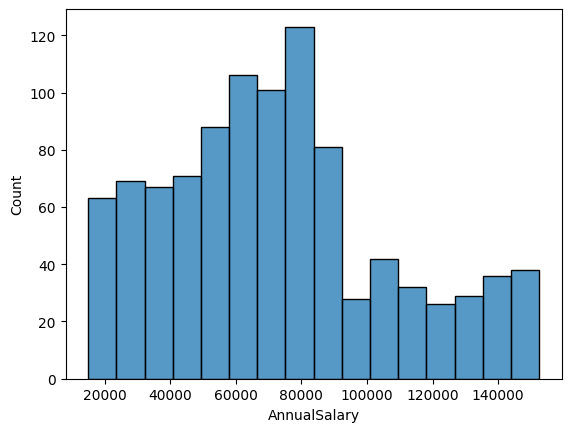

In [4]:
#doing a univariate analysis
sns.histplot(car_data['AnnualSalary'])


<Axes: xlabel='Age', ylabel='Count'>

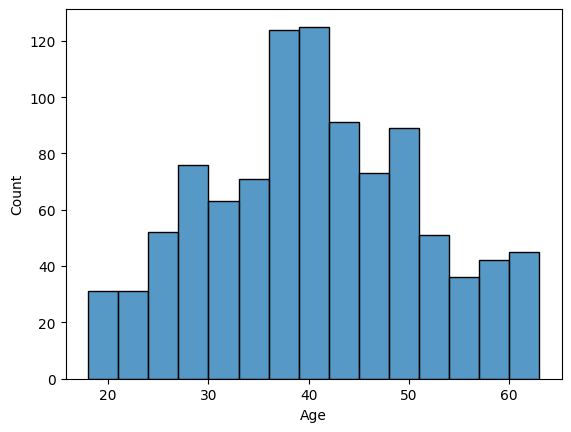

In [6]:
sns.histplot(car_data['Age'])

In [7]:
#importing all the libraries for training the data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

x = car_data.drop(['Purchased','Gender'],axis=1)
y = car_data['Purchased']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardize the feature data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

#train the logistic regression model
model = LogisticRegression()
model.fit(x_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test_scaled)
print("\nMODEL EVALUATION")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Classification Report:\n", classification_report(y_test, y_pred))


MODEL EVALUATION
Accuracy: 0.82
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.93      0.85       112
           1       0.88      0.68      0.77        88

    accuracy                           0.82       200
   macro avg       0.84      0.81      0.81       200
weighted avg       0.83      0.82      0.82       200



In [8]:
# save model and scaler

import pickle
pickle.dump(model, open('car_purchase_decision_model.pkl', 'wb'))
pickle.dump(scaler, open('car_purchase_decision_scaler.pkl', 'wb'))

print("Model and Scaler saved successfully in Colab Environment.")

# download the saved model and scaler
from google.colab import files
files.download('car_purchase_decision_model.pkl')
files.download('car_purchase_decision_scaler.pkl')

Model and Scaler saved successfully in Colab Environment.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>